In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import 
import pickle
from sklearn import tree

#import lux
#XGboost
#impute.KnnImpute

SyntaxError: ignored

In [ ]:
Titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Cleaning Phase

In [ ]:
Titanic = Titanic.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Name'], axis=1)

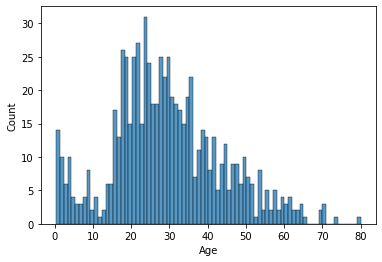

In [ ]:
sns.histplot(Titanic['Age'], bins=80)

In [ ]:
Titanic.duplicated().sum()

114

In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [ ]:
imputer = KNNImputer()
new = np.array(Titanic['Age'])
new = new.reshape(-1, 1)
new.shape
After_imputation = imputer.fit_transform(new)

In [ ]:
Titanic['Age'] = Titanic['Age'].fillna(np.mean(Titanic['Age']))
Titanic['Age'] = Titanic['Age'].astype('int')
Titanic.drop_duplicates(inplace=True)

In [ ]:
print(Titanic.info(), Titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  771 non-null    int64  
 1   Pclass    771 non-null    int64  
 2   Sex       771 non-null    object 
 3   Age       771 non-null    int64  
 4   SibSp     771 non-null    int64  
 5   Parch     771 non-null    int64  
 6   Fare      771 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.2+ KB
None Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


#Preprocessing

In [ ]:
Features = Titanic.loc[:, Titanic.columns != 'Survived']
Target = Titanic.iloc[:, 0]

In [ ]:
# To store the new values we create an empty list
new_list = [] 

# Instantiate label_encoder 
label_encoder = LabelEncoder()

# Looping over the Features to transform it
for i in Features:
  label_ids = label_encoder.fit_transform(Features[i])
  new_list.append(label_ids)

In [ ]:
new_data = np.array(new_list)
y = np.array(Target)
X = np.array(new_data).transpose()

In [ ]:
#We explore
X.shape, y.shape

((771, 6), (771,))

##Model Building

###Splitting the data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
SEED = 1

In [ ]:
# Instantiate scaler
scaler = StandardScaler()

# Transforming X_train
X_train = scaler.fit_transform(X_train)

# Transforming X_test
X_test = scaler.transform(X_test)


###LogisticRegression, KNeighborsClassifier, and BaggingClassifier

In [ ]:
# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=28, random_state=SEED)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=40,
            oob_score=True,
            random_state=1)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('BaggingClassifier', bc)]

for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.796
K Nearest Neighbours : 0.800
BaggingClassifier : 0.773


###GridSearchCV

In [ ]:
# Define params_dt 
# params_dt = {'max_depth':[2,3,4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}
params_dt = {'max_depth':np.arange(2, 40, 0.5), 'min_samples_leaf':np.arange(0.001, 0.1, 0.01)}


# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fitting grid_dt to the traning set
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Evaluate roc_auc_score 
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))


Test set ROC AUC score: 0.797


###RandomForestClassifier

In [ ]:
# Instantiate random_forest
random_forest = RandomForestClassifier(n_estimators=50)

# Fit random_forest to the training set
random_forest.fit(X_train, y_train)

# Evaluate accuracy
Y_pred = random_forest.predict(X_test)
print('Test set accuracy using score: {:.2f}'.format(random_forest.score(X_train, y_train)))

# Evaluate accuracy
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy using accuracy_score: {:.2f}'.format(acc_test))


Test set accuracy using score: 0.98
Test set accuracy using accuracy_score: 0.77


##DecisionTreeClassifier

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 4,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
print('Test set accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Test set accuracy: 0.78


##Plotting DecisionTreeClassifier

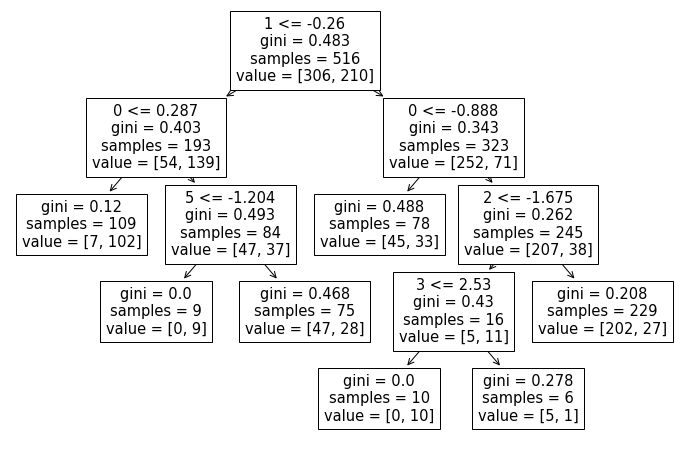

In [ ]:
#We will not be able to get the columns if it is a ndarray
X = pd.DataFrame(X)

#Setting the figure size
plt.figure(figsize=(12, 8));

#Plotting the tree
tree.plot_tree(clf, feature_names=X.columns);

###XGBClassifier

In [ ]:
# Instantiate xg
xg = XGBClassifier(learning_rate=0.02, n_estimators=750)

# Fit training set to xg
xg.fit(X_train, y_train)


xg_predictions = xg.predict(X_test)

# Evaluate accuracy
print('Test set accuracy using accuracy_score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Test set accuracy using roc_auc_score: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))


Test set accuracy using accuracy_score: 0.77
Test set accuracy using roc_auc_score: 0.80


## Exporting the model

In [ ]:
pickle.dump(random_forest, open('model.pkl', 'wb'))

pickled_model = pickle.load(open('model.pkl', 'rb'))

pickled_model

RandomForestClassifier(n_estimators=50)